# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   Dataset yang digunakan dalam penelitian ini diperoleh dari Hugging Face Hub terkait Dataset Diabetes [Dataset Diabetes](https://huggingface.co/datasets/m2s6a8/diabetes_prediction_dataset). Dataset tersebut terdiri dari 9 variabel dengan 100.000 observasi.


# **2. Import Library**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import pickle

# Pemodelan
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

# hyperparameter tuning
#import optuna

# Hitung akurasi
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# **3. Memuat Dataset**

In [5]:
data = pd.read_csv('dataset/data.csv')
print(data)

        Age  Gender  Education  Introversion Score  Sensing Score  \
0      21.0  Female          1             5.89208       2.144395   
1      24.0  Female          1             2.48366       3.206188   
2      26.0  Female          1             7.02910       6.469302   
3      30.0    Male          0             5.46525       4.179244   
4      31.0  Female          0             3.59804       6.189259   
...     ...     ...        ...                 ...            ...   
43739  26.0    Male          1             8.88656       5.118399   
43740  29.0    Male          0             2.71470       6.851956   
43741  25.0  Female          0             2.00982       6.544036   
43742  23.0    Male          0             7.23553       4.876780   
43743  21.0    Male          0             1.88310       4.055642   

       Thinking Score  Judging Score    Interest Personality  
0             7.32363       5.462224        Arts        ENTP  
1             8.06876       3.765012     Unkn

# **4. Exploratory Data Analysis (EDA)**

## 4.1 Membuat Ringkasan Statistik

In [6]:
summary = data.describe(include='all')
print(summary)

                 Age Gender     Education  Introversion Score  Sensing Score  \
count   43744.000000  43744  43744.000000        43744.000000   43744.000000   
unique           NaN      2           NaN                 NaN            NaN   
top              NaN   Male           NaN                 NaN            NaN   
freq             NaN  24155           NaN                 NaN            NaN   
mean       27.437203    NaN      0.229014            4.588349       5.780074   
std         4.893805    NaN      0.420203            2.902628       1.241648   
min        18.000000    NaN      0.000000            0.000150       0.000000   
25%        24.000000    NaN      0.000000            2.067020       4.953340   
50%        27.000000    NaN      0.000000            4.261680       6.162928   
75%        30.000000    NaN      0.000000            7.085002       6.622978   
max        52.000000    NaN      1.000000            9.999920       9.803837   

        Thinking Score  Judging Score I

**Penjelasan :**

Berdasarkan deksripsi statistik dari data yang diperoleh, terlihat bahwa dataset berjumlah 100.000 observasi. Terdapat 9 variabel pada dataset yang digunakan. Variabel kategorik yang digunakan adalah gender (Jenis Kelamin) dan smoking_history (Riwayat Merokok). Berdasarkan data yang diberikan terdapat 3 nilai pada variabel gender, yaitu Male, Female, dan Other. Pada variabel smoking_history terdaapt 6 nilai bertipe nominal. 

Pada variabel numerik terdapat 7 variabel seperti age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level, dan diabetes. Terlihat berdasarkan keseluruhan data, responden berada pada usia 41 - 42 tahun. Selain itu terlihat standar deviasi usia berada di nilai 22 - 23 tahun, hal tersebut menunjukkan kondisi dimana terdapat keberagaman usia responden. Selain itu, pada variabel hypertension terlihat rata-rata nilai berada di angka 0.07 dan memiliki standar deviasi cukup besar yaitu 0.26, di mana nilainya lebih besar dibanding rataannya. Hal ini juga ditunjukkan pada variabel heart_disease, di mana nilainya juga lebih besar dibanding rataannya.

Pada variabel bmi yang menyatakan Body Mass Index terlihat bahwa rataan responden berada pada nilai 27 - 28. Pada variabel HbA1c_level terlihat nilai minimum 3.5 dan max 9. Nilai rataan menunjukkan nilai 5.52 karena mendekati nilai minimum. Pada variabel blood_glucose_level terlihat bahwa responden berada ada gula rata-rata 138. Terakhir, pada variabel target yaitu status diabetes terlihat bahwa responden cenderung berada pada kondisi tidak terkena diabetes.

## 4.2 Visualisasi Data

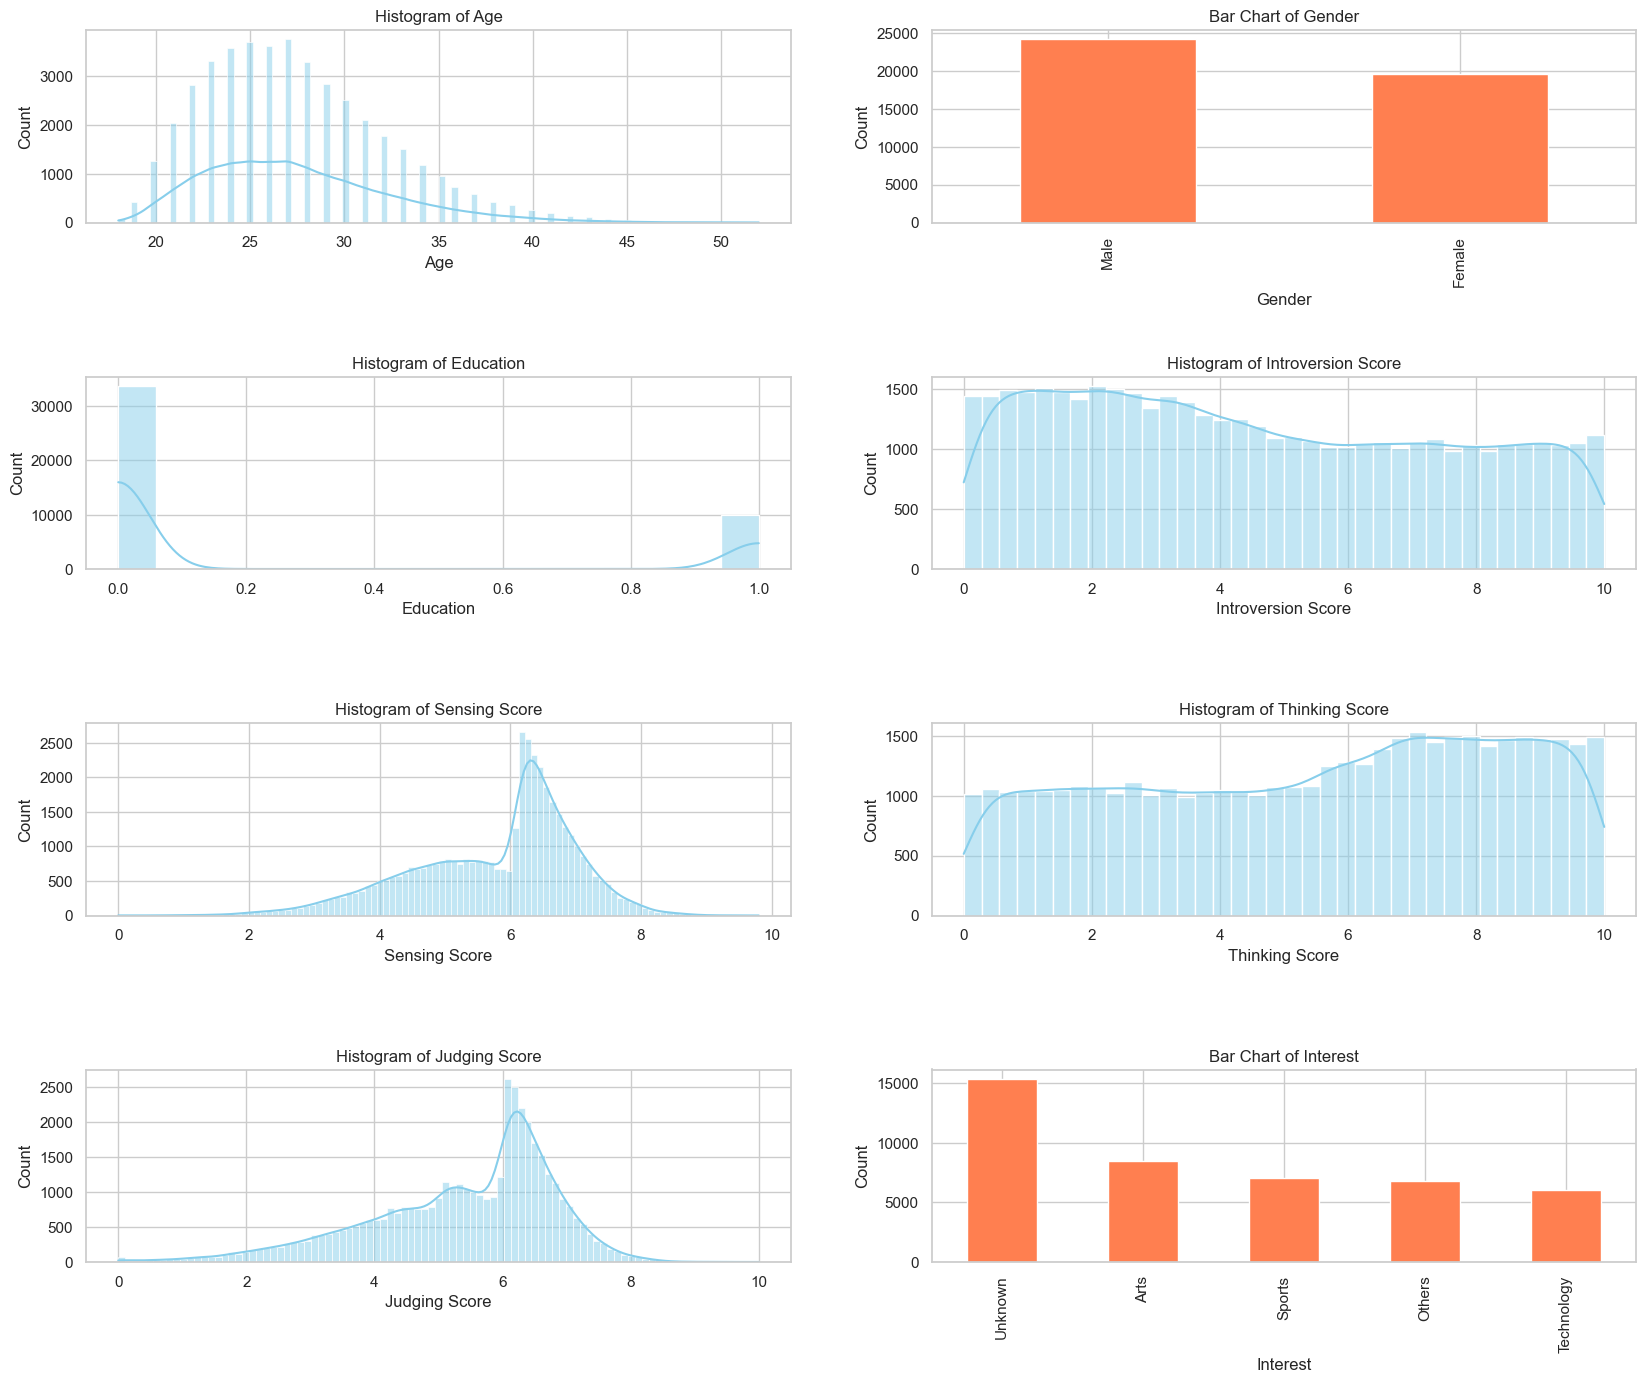

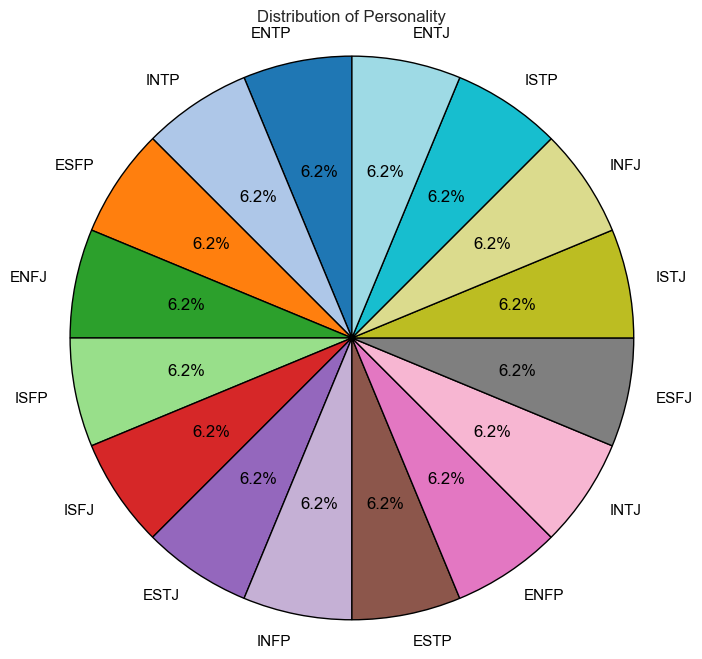

In [7]:

def visualisasiData(df, label_column):
    sns.set(style="whitegrid")
    n_cols = 2
    cols = df.columns.drop(label_column)
    n_rows = (len(cols) + 1) // n_cols

    plt.figure(figsize=(20, n_rows * 4))

    for idx, col in enumerate(cols):
        plt.subplot(n_rows, n_cols, idx + 1)
        if pd.api.types.is_numeric_dtype(df[col]):
            sns.histplot(df[col], kde=True, color="skyblue")
            plt.title(f'Histogram of {col}')
        else:
            df[col].value_counts().plot(kind='bar', color='coral')
            plt.title(f'Bar Chart of {col}')
            plt.xlabel(col)
            plt.ylabel("Count")

    plt.subplots_adjust(hspace=0.8) 
    
    # Pie chart full 1 kolom dengan legend di luar dan warna berbeda
    plt.figure(figsize=(8, 8))
    label_counts = df[label_column].value_counts()
    labels = label_counts.index.tolist()
    
    # Generate warna unik untuk tiap kategori pakai colormap
    colors = cm.tab20(np.linspace(0, 1, len(labels)))

    wedges, texts, autotexts = plt.pie(
        label_counts, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'black'},
        textprops={'color':"black"}
    )
    
    plt.title(f'Distribution of {label_column}')
    plt.axis('equal')
    plt.show()

visualisasiData(data, 'Personality')


**Penjelasan :**

Pada visualisasi yang diperoleh terlihat pada distribusi label didominasi dengan kondisi tidak terkena diabetes. Hal ini umum terjadi pada data medis, di mana kondisi tidak terkena penyakit lebih sering dijumpai dibanding dengan kondisi terkena penyakit. Sebaran nilai age itu terlihat bahwa usia didominasi pada responden lansia, dimana frekuensi tertinggi pada usia 80 tahun. Selain itu, responden didominasi pada jenis kelamin laki-laki.

# **5. Data Preprocessing**

## 5.1 Encoding Variabel Kategorik

In [8]:
def preprocessingData(df, kolom, jenis=1, save_dir="Encoder Tersimpan"):
    os.makedirs(save_dir, exist_ok=True)

    # Jenis = 1 untuk label encoding
    if jenis == 1:
        le = LabelEncoder()
        df[kolom] = le.fit_transform(df[kolom])

        # Encoder di simpan
        encoder_path = os.path.join(save_dir, f"{kolom}_label_encoder.pkl")
        with open(encoder_path, 'wb') as file:
            pickle.dump(le, file)
        return df, le

    # Jenis = 2 untuk One Hot Encoding
    elif jenis == 2:
        df = pd.get_dummies(df, columns=[kolom], prefix=kolom)
        return df, None
    
    else:
        raise ValueError("Nilai parameter 'jenis' hanya diperbolehkan 1 (untuk Label Encoding) atau 2 (untuk One Hot Encoding)")


data1, encoder_gender = preprocessingData(data, 'Gender', 1)
data2, encoder_interest = preprocessingData(data1, 'Interest', 2)
data3, encoder_personality = preprocessingData(data2, 'Personality', 1)
print (data3)

        Age  Gender  Education  Introversion Score  Sensing Score  \
0      21.0       0          1             5.89208       2.144395   
1      24.0       0          1             2.48366       3.206188   
2      26.0       0          1             7.02910       6.469302   
3      30.0       1          0             5.46525       4.179244   
4      31.0       0          0             3.59804       6.189259   
...     ...     ...        ...                 ...            ...   
43739  26.0       1          1             8.88656       5.118399   
43740  29.0       1          0             2.71470       6.851956   
43741  25.0       0          0             2.00982       6.544036   
43742  23.0       1          0             7.23553       4.876780   
43743  21.0       1          0             1.88310       4.055642   

       Thinking Score  Judging Score  Personality  Interest_Arts  \
0             7.32363       5.462224            3           True   
1             8.06876       3.76501

**Penjelasan :**

Berdasarkan perbedaan jenis variabel sebelumnya, dilakukan proses encoding untuk variabel kategorik agar berubah pada tipe numerik. Jenis encoding untuk variabel gender adalah Label Encoder sehingga jenis kelamin akan dinyatakan oleh nilai 0, 1, dan 2. Variabel smoking_history menggunakan encoder berupa One Hot Encoding, sehingga setiap kategori akan dipisahkan menjadi sebanyak 6 kolom yang berisi nilai boolean True (1) atau False (0).

## 5.2 Splitting Data

In [9]:
y = data3["Personality"]
X = data3.drop(columns=["Personality"])

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)